# Demystifying Recurrent Neural Network

### Hand Designing an LSTM
1. What do we want to keep? - it seems like we only need h<sub>t-1</sub> and new x to predict h<sub>1</sub>. 
2. How to configure the forget gate?
3. h = tanh(...) = [-1,1]

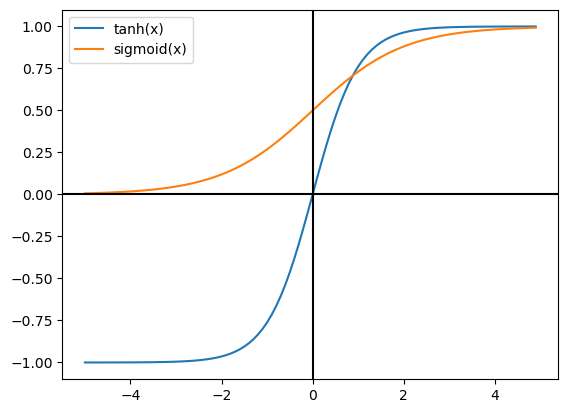

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def np_sigmoid(x):
  return 1/(1 + np.exp(-x))


x = np.arange(-5,5,0.1)
plt.plot(x, np.tanh(x), label="tanh(x)")
plt.plot(x, np_sigmoid(x), label="sigmoid(x)")
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")
plt.legend()

In [86]:
# from univariate_tester import test_parity_lstm
import numpy as np
import itertools
import pandas as pd

def s(x):
  return 1/(1 + np.exp(-x))

def test_parity_lstm(w_ix = 0, w_ih = 0, b_i = 0, 
                     w_fx = 0, w_fh = 0, b_f = 0,
                     w_ox = 0, w_oh = 0, b_o = 0,
                     w_gx = 0, w_gh = 0, b_g = 0):
    cnt = 0
    
    i_list = []
    f_list = []
    g_list = []
    o_list = []
    c_list = []
    h_list = []
    
    # for X in itertools.product([0,1], repeat=14):
    for X in [(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)]:
        c = 0
        h = 0
        for x in X:
            i = s(w_ih*h + w_ix*x + b_i)    # input gate layer
            f = s(w_fh*h + w_fx*x + b_f)    # forget gate layer
            g = np.tanh(w_gh*h + w_gx*x + b_g)  # new state candidate
            o = s(w_oh*h + w_ox*x + b_o)    # output
            c = f*c + i*g                   # cell state
            h = o*np.tanh(c)                # filtered output
            
            i_list.append(i)
            f_list.append(f)
            g_list.append(g)
            o_list.append(o)
            c_list.append(c)
            h_list.append(h)
            
        if np.sum(X)%2 != int(h>0.5):
            print("Failure", cnt, X, ", sum(X) =", np.sum(X), ", h =", "%.02f" % h, 
                  np.sum(X)%2 == int(h>0.5))
            break
        if cnt % 1000 == 0:
            print(cnt)
            
        cnt += 1
    
    history = pd.DataFrame()
    history['i'] = i_list
    history['f'] = f_list
    history['g'] = g_list
    history['o'] = o_list
    history['c'] = c_list
    history['h'] = h_list
    
    print(history)

test_parity_lstm(w_ix = 3, w_ih = 0, b_i = -0.5, 
                w_fx = 0, w_fh = 1, b_f = 0,
                w_ox = 1, w_oh = 1, b_o = 0,
                w_gx = 3, w_gh = -3, b_g = 2)

Failure 0 (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1) , sum(X) = 2 , h = 0.80 False
           i         f         g         o         c         h
0   0.377541  0.500000  0.964028  0.500000  0.363960  0.174348
1   0.377541  0.543477  0.900896  0.543477  0.537929  0.267075
2   0.377541  0.566375  0.833281  0.566375  0.619266  0.311856
3   0.377541  0.577338  0.787355  0.577338  0.654785  0.331901
4   0.377541  0.582222  0.763392  0.582222  0.669442  0.340374
5   0.377541  0.584281  0.752580  0.584281  0.675272  0.343813
6   0.377541  0.585116  0.748072  0.585116  0.677540  0.345171
7   0.377541  0.585446  0.746272  0.585446  0.678411  0.345697
8   0.377541  0.585574  0.745571  0.585574  0.678743  0.345899
9   0.377541  0.585623  0.745302  0.585623  0.678869  0.345977
10  0.377541  0.585642  0.745199  0.585642  0.678917  0.346006
11  0.377541  0.585649  0.745160  0.585649  0.678935  0.346017
12  0.924142  0.585651  0.999276  0.793478  1.321092  0.687989
13  0.924142  0.665519  0.994382  0

# Learning to Copy Finite State Machines

### Parity: Examining Generalization To Longer Sequences

### Embedded Reber Grammers: Thinking About Memory

# Part-of-Speech Tagging